<a href="https://colab.research.google.com/github/MLUISG/Projects/blob/main/Mark_Guereque_Project_1v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Problem
Can we predict if a customer will make future transactions using gaussian naive bayes?

### Imports, mounting, and tools


In [1]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
train_path = '/drive/My Drive/Project 1/Train.csv'
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.fromnumeric import shape
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, metrics, model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import pandas as pd
import seaborn as sns

In [3]:
train_orig = pd.read_csv(train_path)

###Homemade Functions


In [4]:
# Homemade Functions

def show_me(money):
  """Displays info, describe, head, and tail"""
  print('Info')  
  print(money.info())
  print('\n')
  print('\n')
  print('Described')
  print(money.describe().T)
  print('\n')
  print('\n')
  print('Head')
  print(money.head().T)
  print('\n')
  print('\n')
  print('Tail')
  print(money.tail().T)

In [5]:
def count_nulls(data):
    """Checks for null values and displays only nulls"""
    temp = data.isna().sum()
    filter = temp > 0
    print(data.shape)
    print(temp[filter])

#Data Examination

In [6]:
show_me(train_orig)

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  180000 non-null  int64  
 1   ID_code     180000 non-null  object 
 2   target      180000 non-null  int64  
 3   var_0       180000 non-null  float64
 4   var_1       180000 non-null  float64
 5   var_2       180000 non-null  float64
 6   var_3       180000 non-null  float64
 7   var_4       180000 non-null  float64
 8   var_5       180000 non-null  float64
 9   var_6       180000 non-null  float64
 10  var_7       180000 non-null  float64
 11  var_8       180000 non-null  float64
 12  var_9       180000 non-null  float64
 13  var_10      180000 non-null  float64
 14  var_11      180000 non-null  float64
 15  var_12      180000 non-null  float64
 16  var_13      180000 non-null  float64
 17  var_14      180000 non-null  float64
 18  var_15      180000 non-null  float64
 1

In [7]:
shape(train_orig)

(180000, 53)

In [8]:
count_nulls(train_orig)

(180000, 53)
Series([], dtype: int64)


#Data Cleaning
After examining the data I've determined that I don't need the Unnamed: 0 and ID_code because they don't offer me anything beyond an indexing number.


In [9]:
target_var = train_orig.copy()
target_var.drop(['Unnamed: 0', 'ID_code'], axis=1, inplace=True)

In [10]:
target_var

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,22.3368,11.4176,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,16.0279,15.7685,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,15.2717,7.7995,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,20.4504,29.9869,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760


In [11]:
target_var_drop = target_var.drop(['target'], axis=1)

In [12]:
target_var_drop

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,2.5791,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,8.5524,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,1.2145,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,6.8202,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,10.1102,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,22.3368,11.4176,3.6973,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,16.0279,15.7685,3.2069,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,15.2717,7.7995,3.3400,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,20.4504,29.9869,3.7526,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760


In [13]:
random_working_sample = target_var.sample(n = 100000)

In [14]:
random_working_sample

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
77160,0,8.9204,-5.4724,8.7857,5.3829,6.3149,14.0163,5.6965,16.5375,24.8319,...,5.3499,2.4190,-1.9636,25.6508,4.8145,16.6218,-2.7856,8.8845,-0.4918,12.9784
172791,0,7.5469,-9.1225,7.6097,4.8593,5.6798,13.7218,5.0421,10.6865,19.9214,...,5.5308,-3.6582,4.4586,17.9192,2.5680,32.2549,1.2195,1.1024,2.8487,14.2749
143190,0,10.4179,0.6624,11.7322,6.1670,7.5460,14.1714,5.0678,2.6910,15.5656,...,6.1897,10.4605,-0.5746,16.6278,7.8822,-0.9604,9.4082,4.3804,-0.9033,15.0887
129199,0,12.4511,-0.8987,7.8604,4.4614,8.1264,14.1373,11.7145,16.7173,21.6902,...,4.9170,-5.2644,-5.0762,19.7967,0.4168,9.5593,-2.8943,5.4656,1.6742,16.5247
67431,0,13.6501,-4.0341,10.3931,6.3935,9.1116,13.8324,12.4623,25.4860,8.1754,...,5.7053,6.9481,1.6360,18.6010,2.3594,27.7488,0.2453,9.2845,2.6572,20.2410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147897,0,10.2398,-10.4041,11.9008,5.8148,5.7943,14.1221,-0.0811,21.7851,9.8490,...,5.2840,3.0291,3.8704,3.7655,3.2264,30.6533,1.6206,14.2173,1.0269,19.1096
16012,0,12.8578,-0.9627,13.4664,5.0878,6.3926,13.8515,7.7572,16.0696,26.5850,...,6.0322,-3.6037,9.5874,20.7842,8.1601,25.6790,5.4644,7.8215,3.0694,14.7019
7819,0,6.4559,-3.3251,9.0569,3.9860,8.9370,13.9286,4.6227,28.8478,21.4930,...,4.9312,5.4976,-2.8772,34.4848,1.0797,6.7951,5.5001,12.4031,2.7228,9.7959
59366,0,13.2512,3.9208,8.9454,5.7284,7.3906,13.9580,4.0205,3.0128,16.8291,...,5.5476,-4.9000,-9.6725,26.8386,5.7357,14.4927,2.3484,2.5253,4.4162,20.9352


#Exploratory Data Analysis
Here I'm going to explore the data by creating visuals and sample variables.

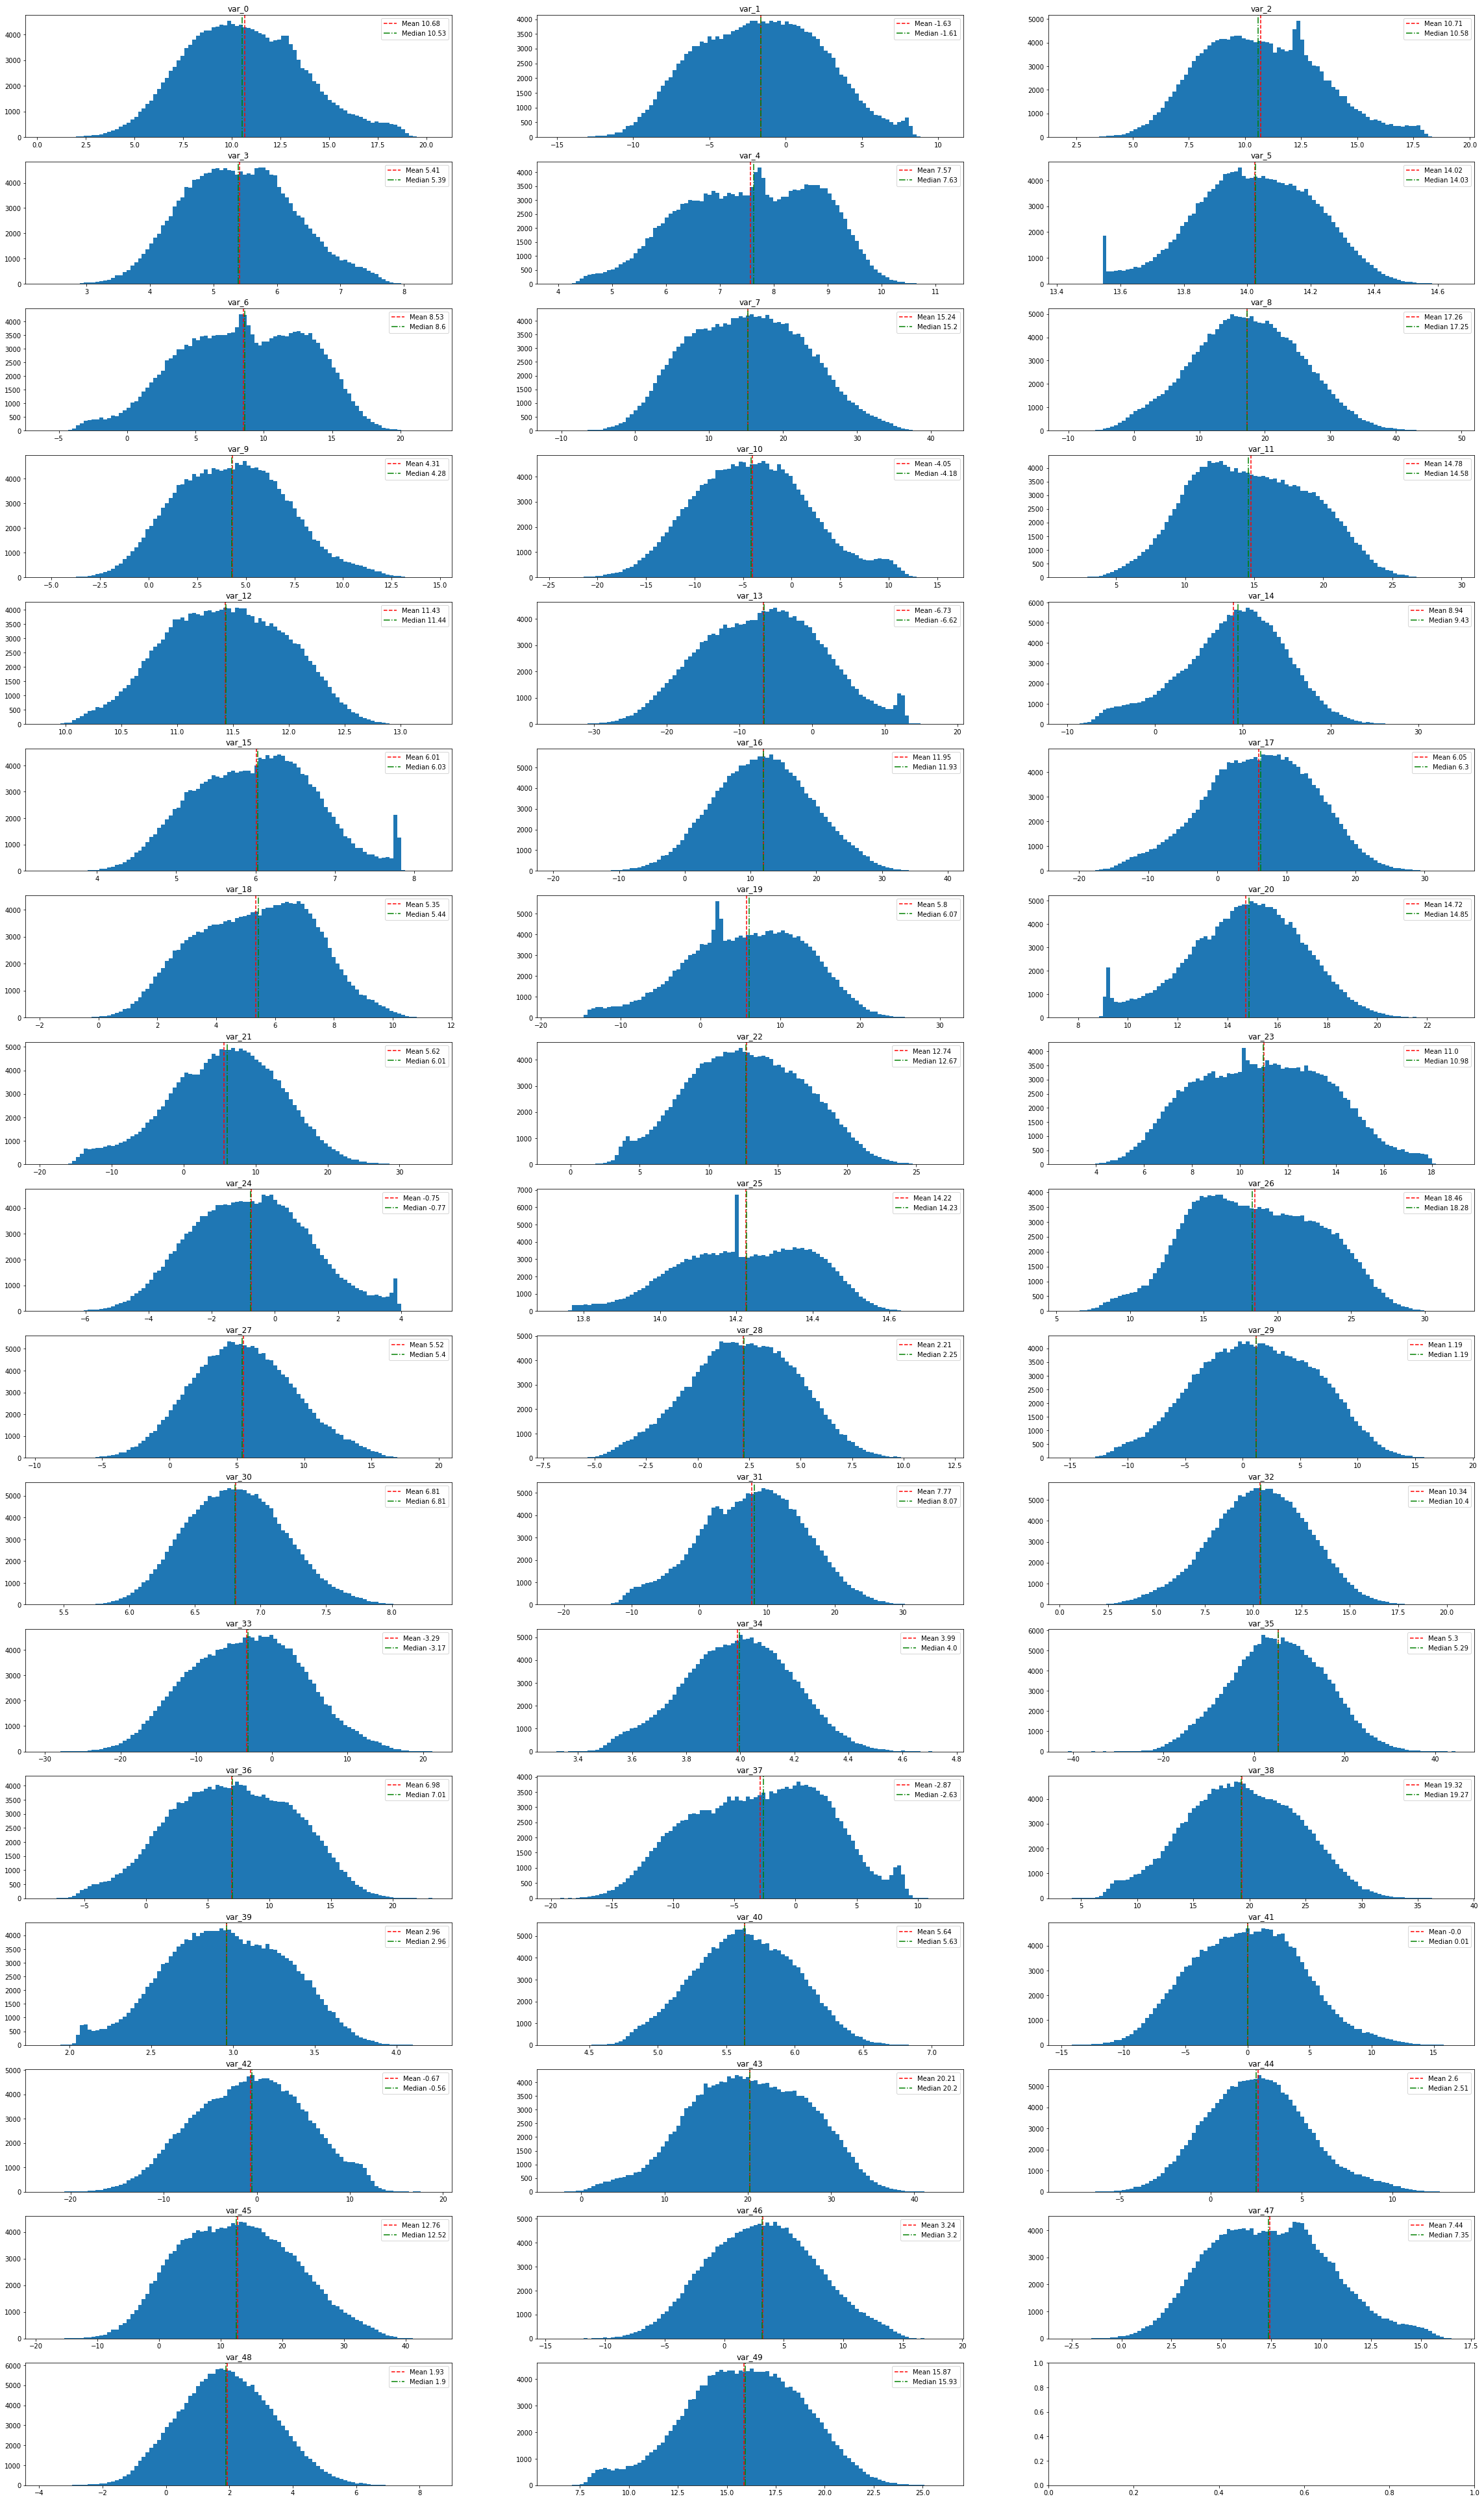

In [15]:
fig, axs = plt.subplots(nrows=17, ncols=3, figsize=(40, 70))
for i, col in enumerate(target_var_drop.columns):
    ax = axs[i // 3, i % 3]  
    ax.hist(target_var_drop[col], bins=100)
    ax.axvline(target_var_drop[col].mean(), color='r', linestyle='--', label=(f'Mean {target_var_drop[col].mean().round(2)}'))
    ax.axvline(target_var_drop[col].median(), color='g', linestyle='-.', label=(f'Median {target_var_drop[col].median().round(2)}'))
    ax.set_title(col)  
    ax.legend()  

In [16]:
train_orig['target'].value_counts()

0    161960
1     18040
Name: target, dtype: int64

<AxesSubplot:>

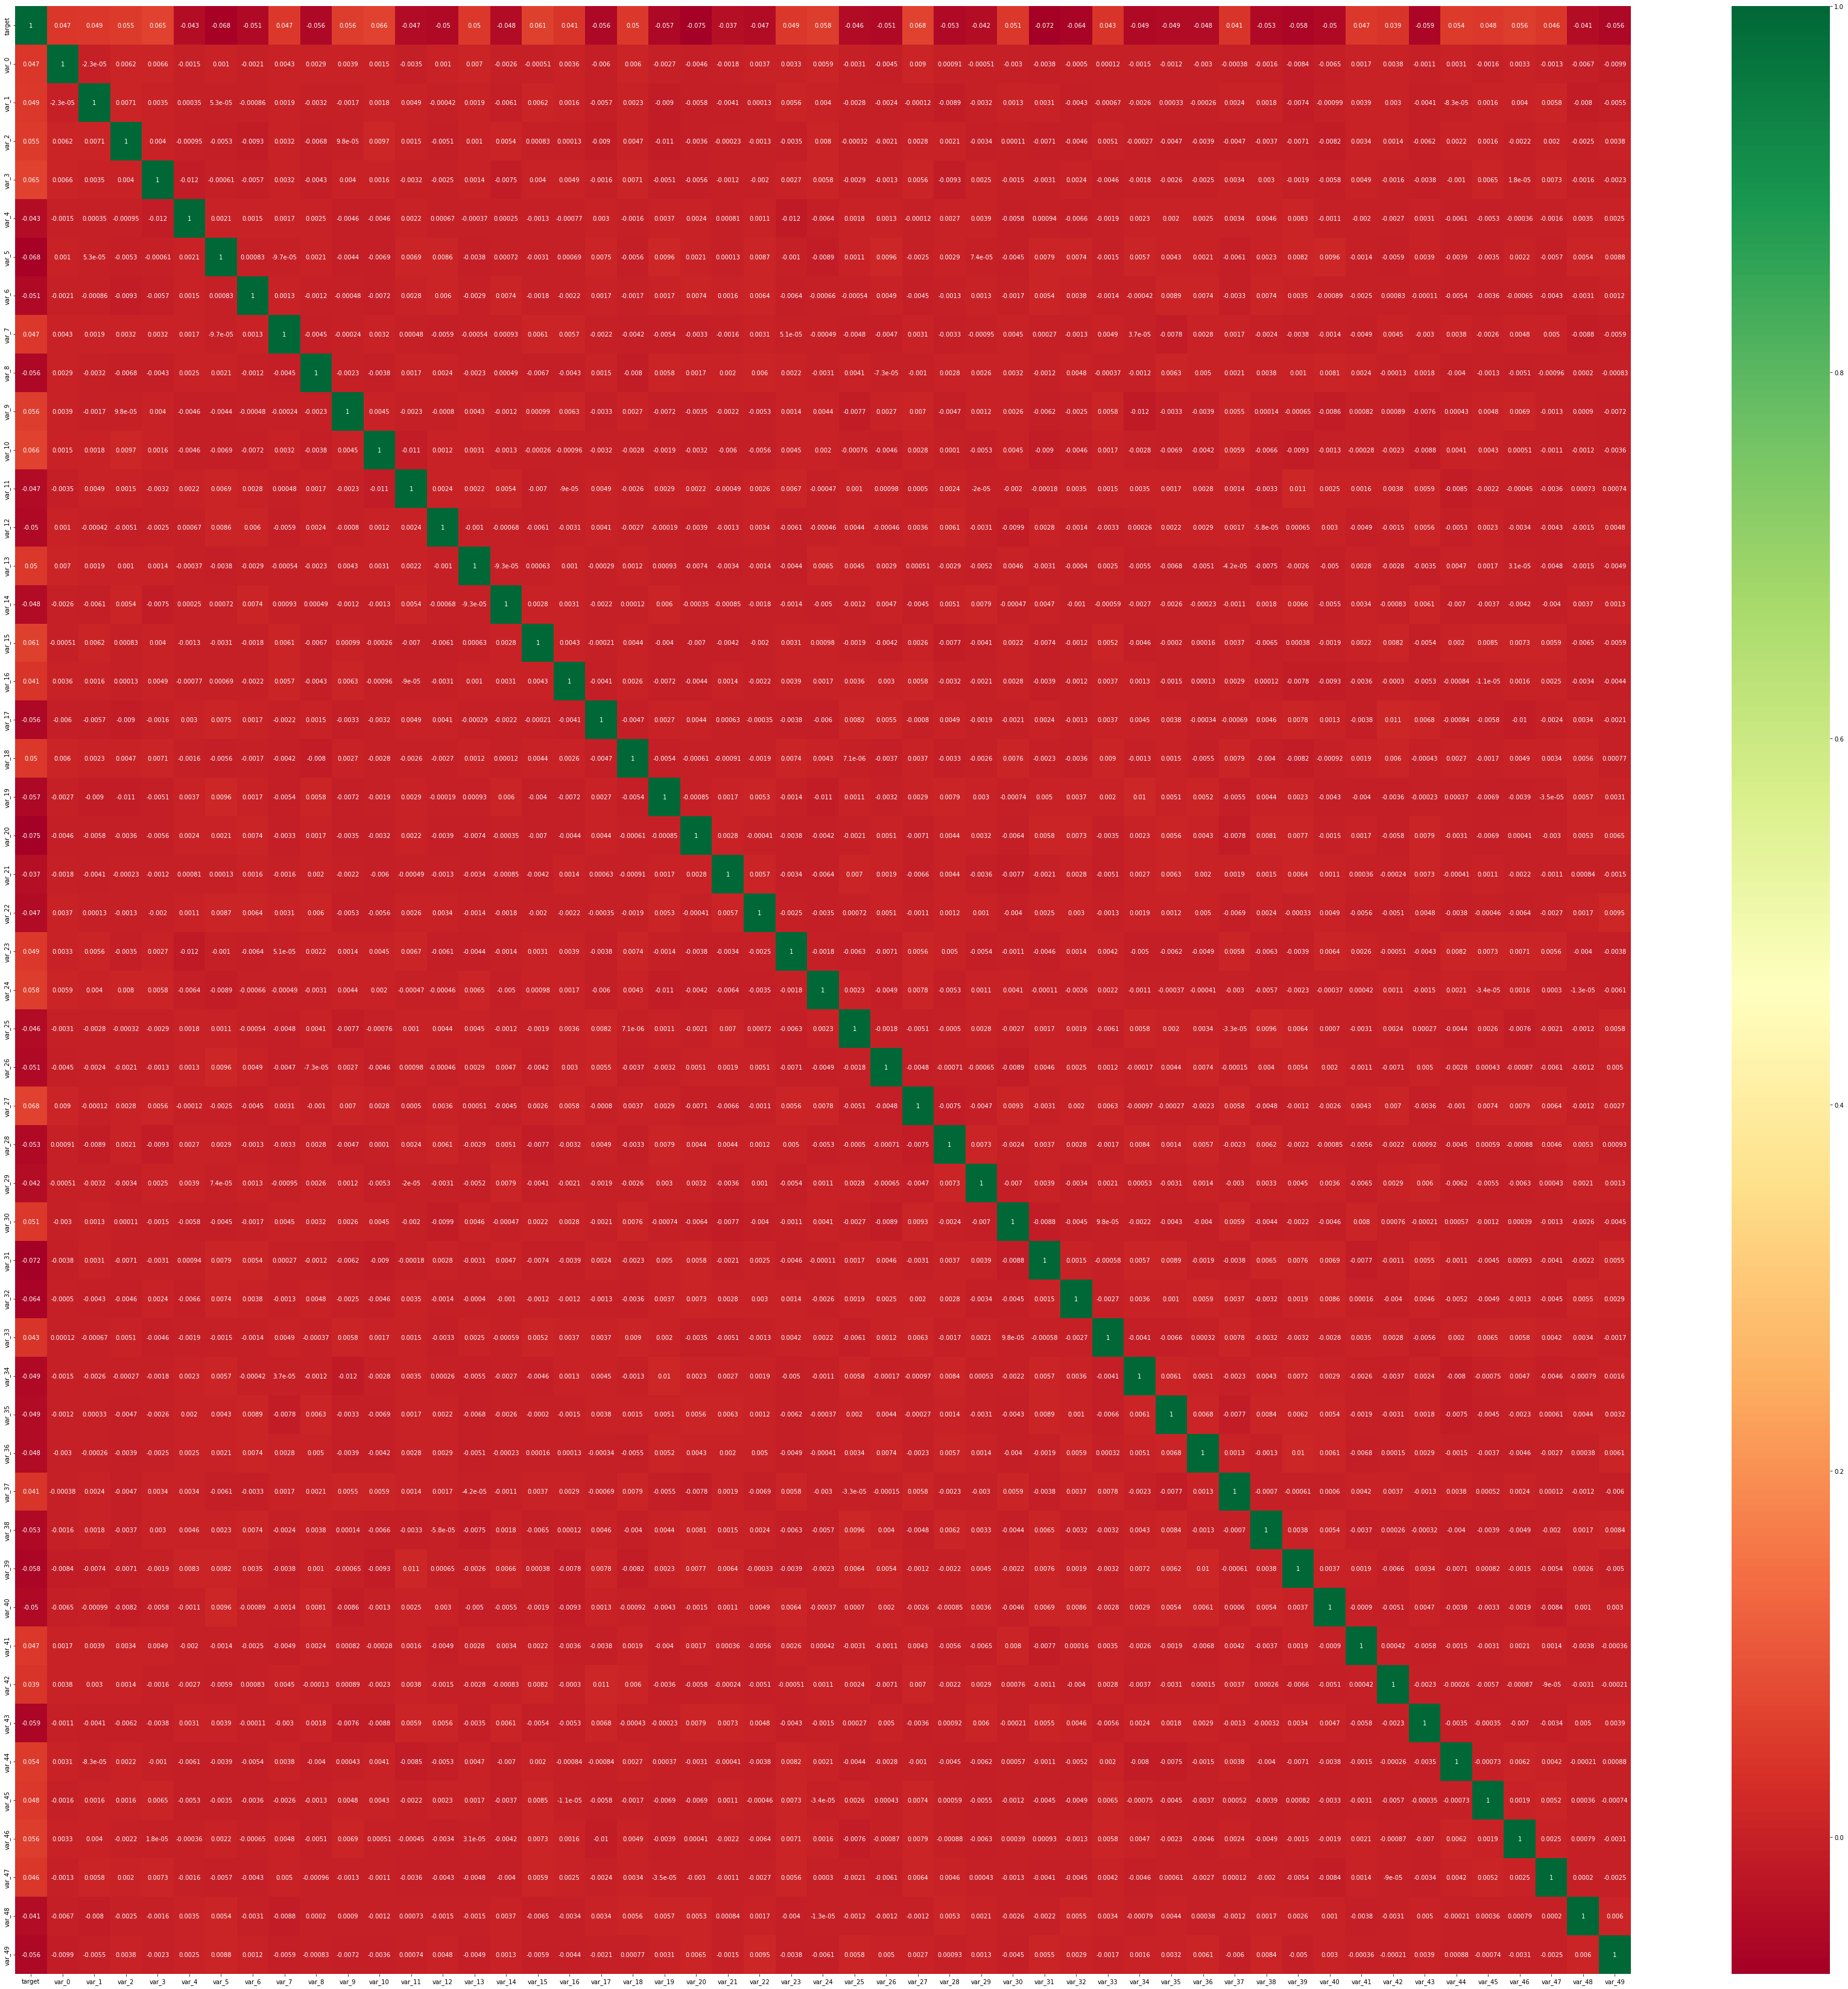

In [17]:
samp_corr = random_working_sample.corr()
plt.figure(figsize=(60,60))
sns.heatmap(samp_corr, annot=True, cmap='RdYlGn')

In [18]:
success_df = train_orig[train_orig['target'] == 1].copy()
success_df.drop(['Unnamed: 0', 'ID_code'], axis=1, inplace=True)
success_df['target'].value_counts()

1    18040
Name: target, dtype: int64

In [19]:
unsuccess_df = train_orig[train_orig['target'] == 0].copy()
unsuccess_df.drop(['Unnamed: 0', 'ID_code'], axis=1, inplace=True)
unsuccess_df['target'].value_counts()

0    161960
Name: target, dtype: int64

#Data Processing
Because I determined there is no correlation between the data I'm going to now create my train and test for Gaussian Naïve Bayes.

In [20]:
y = random_working_sample['target'].copy()
X = random_working_sample.drop('target', axis=1, inplace=False)

In [21]:
gnb = GaussianNB()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 20000 points : 1773


In [23]:
num_loops = 1000
accuracy_scores = np.zeros(num_loops)

In [24]:
for i in range(num_loops):
  model_split_xv = GaussianNB()
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
  model_split_xv.fit(X_train, y_train)
  y_split_pred = model_split_xv.predict(X_test)
  accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

In [25]:
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
median_accuracy = np.median(accuracy_scores)
print("Mean accuracy: ", mean_accuracy)
print("Standard deviation of accuracy: ", std_accuracy)
print("Median of accuracy: ", median_accuracy)

Mean accuracy:  0.9114356
Standard deviation of accuracy:  0.0017598146606958359
Median of accuracy:  0.9113


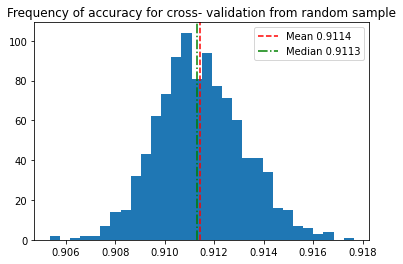

In [26]:
plt.hist(accuracy_scores, bins=30)
plt.title('Frequency of accuracy for cross- validation from random sample')
plt.axvline(mean_accuracy, color='red', linestyle='--', label=f'Mean {mean_accuracy.round(4)}')
plt.axvline(median_accuracy, color='green', linestyle='-.', label=f'Median {median_accuracy.round(4)}')
plt.legend()
plt.show()

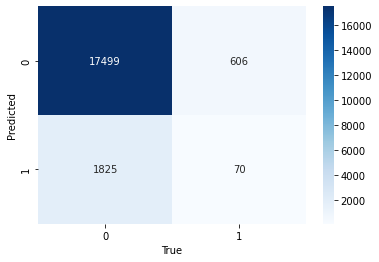

In [27]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.gca().set_xlabel('True')
plt.gca().set_ylabel('Predicted')
plt.show()

In [28]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     18105
           1       0.10      0.04      0.05      1895

    accuracy                           0.88     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.83      0.88      0.85     20000



In [29]:
success_vs_non = pd.concat([success_df.head(18000), unsuccess_df.head(18000)])

In [30]:
y = success_vs_non['target'].copy()
X = success_vs_non.drop('target', axis=1, inplace=False)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 7200 points : 1796


In [32]:
num_loops = 1000
accuracy_scores = np.zeros(num_loops)

In [38]:
for i in range(num_loops):
  model_split_xv = GaussianNB()
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
  model_split_xv.fit(X_train, y_train)
  y_split_pred = model_split_xv.predict(X_test)
  accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

In [39]:
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
median_accuracy = np.median(accuracy_scores)
print("Mean accuracy: ", mean_accuracy)
print("Standard deviation of accuracy: ", std_accuracy)
print("Median of accuracy: ", median_accuracy)

Mean accuracy:  0.7568445833333333
Standard deviation of accuracy:  0.004495977366570018
Median of accuracy:  0.7570833333333333


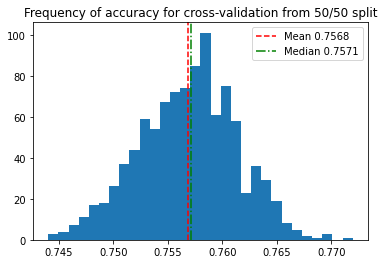

In [40]:
plt.hist(accuracy_scores, bins=30)
plt.title('Frequency of accuracy for cross-validation from 50/50 split')
plt.axvline(mean_accuracy, color='red', linestyle='--', label=f'Mean {mean_accuracy.round(4)}')
plt.axvline(median_accuracy, color='green', linestyle='-.', label=f'Median {median_accuracy.round(4)}')
plt.legend()
plt.show()

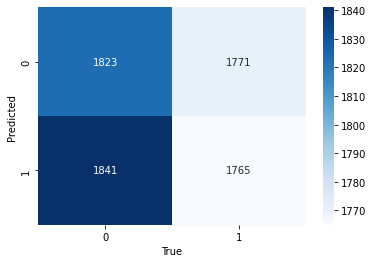

In [41]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.gca().set_xlabel('True')
plt.gca().set_ylabel('Predicted')
plt.show()

In [42]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.51      0.50      3594
           1       0.50      0.49      0.49      3606

    accuracy                           0.50      7200
   macro avg       0.50      0.50      0.50      7200
weighted avg       0.50      0.50      0.50      7200

